In [1]:
from shutil import copyfile
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict
import pandas as pd
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

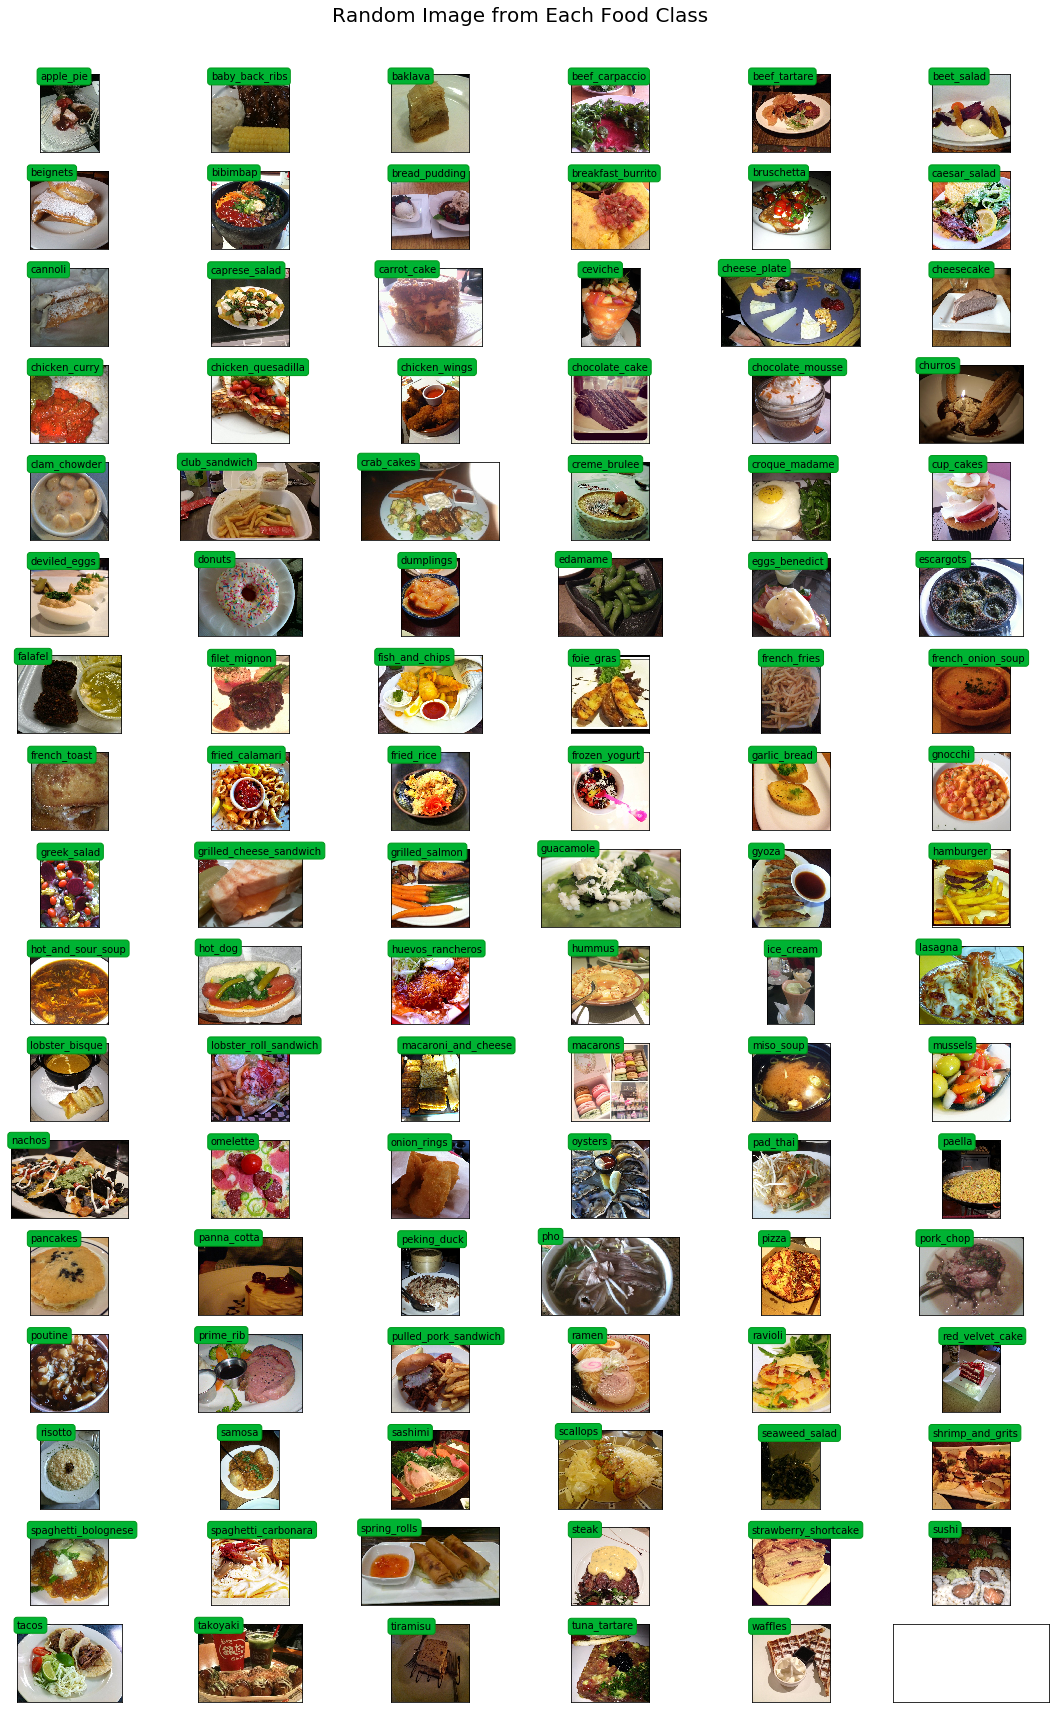

In [2]:
root_dir = "food-101/images/"
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [3]:
import json
test_json = open('food-101/meta/test.json', 'r')
test_json = json.load(test_json)
classes = list(test_json.keys())
classes[:10]

['churros',
 'hot_and_sour_soup',
 'samosa',
 'sashimi',
 'pork_chop',
 'spring_rolls',
 'panna_cotta',
 'beef_tartare',
 'greek_salad',
 'foie_gras']

In [4]:
train_df =  pd.read_csv('food-101/meta/train.txt',delimiter='/', header=None, names=['label', 'image_file'] )
train_df['image_file'] = train_df['label'].astype(str) + '/' + train_df['image_file'].astype(str) + '.jpg'
train_df.head()

label             image_file
0  apple_pie  apple_pie/1005649.jpg
1  apple_pie  apple_pie/1014775.jpg
2  apple_pie  apple_pie/1026328.jpg
3  apple_pie  apple_pie/1028787.jpg
4  apple_pie  apple_pie/1043283.jpg

In [5]:
test_df =  pd.read_csv('food-101/meta/test.txt',delimiter='/', header=None, names=['label', 'image_file'] )
test_df['image_file'] = test_df['label'].astype(str) + '/' + test_df['image_file'].astype(str) + '.jpg'
test_df.head()

label             image_file
0  apple_pie  apple_pie/1011328.jpg
1  apple_pie   apple_pie/101251.jpg
2  apple_pie  apple_pie/1034399.jpg
3  apple_pie   apple_pie/103801.jpg
4  apple_pie  apple_pie/1038694.jpg

In [6]:
 root_dir + train_df.iloc[1]['image_file']

'food-101/images/apple_pie/1014775.jpg'

In [7]:
@interact(n=(0, len(train_df)))
def show_pic(n):
    img = plt.imread(root_dir + train_df.iloc[n]['image_file'])
    plt.imshow(img)
    print('class:', train_df.iloc[n]['label'])

interactive(children=(IntSlider(value=37875, description='n', max=75750), Output()), _dom_classes=('widget-int…

In [8]:
labelled = train_df.groupby('label')

In [9]:
labelled.groups.keys()

dict_keys(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons',

In [10]:
def getKey(x):
    return x

In [11]:
widget = interactive(getKey, x=labelled.groups.keys())
display(widget)


interactive(children=(Dropdown(description='x', options=('apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpa…

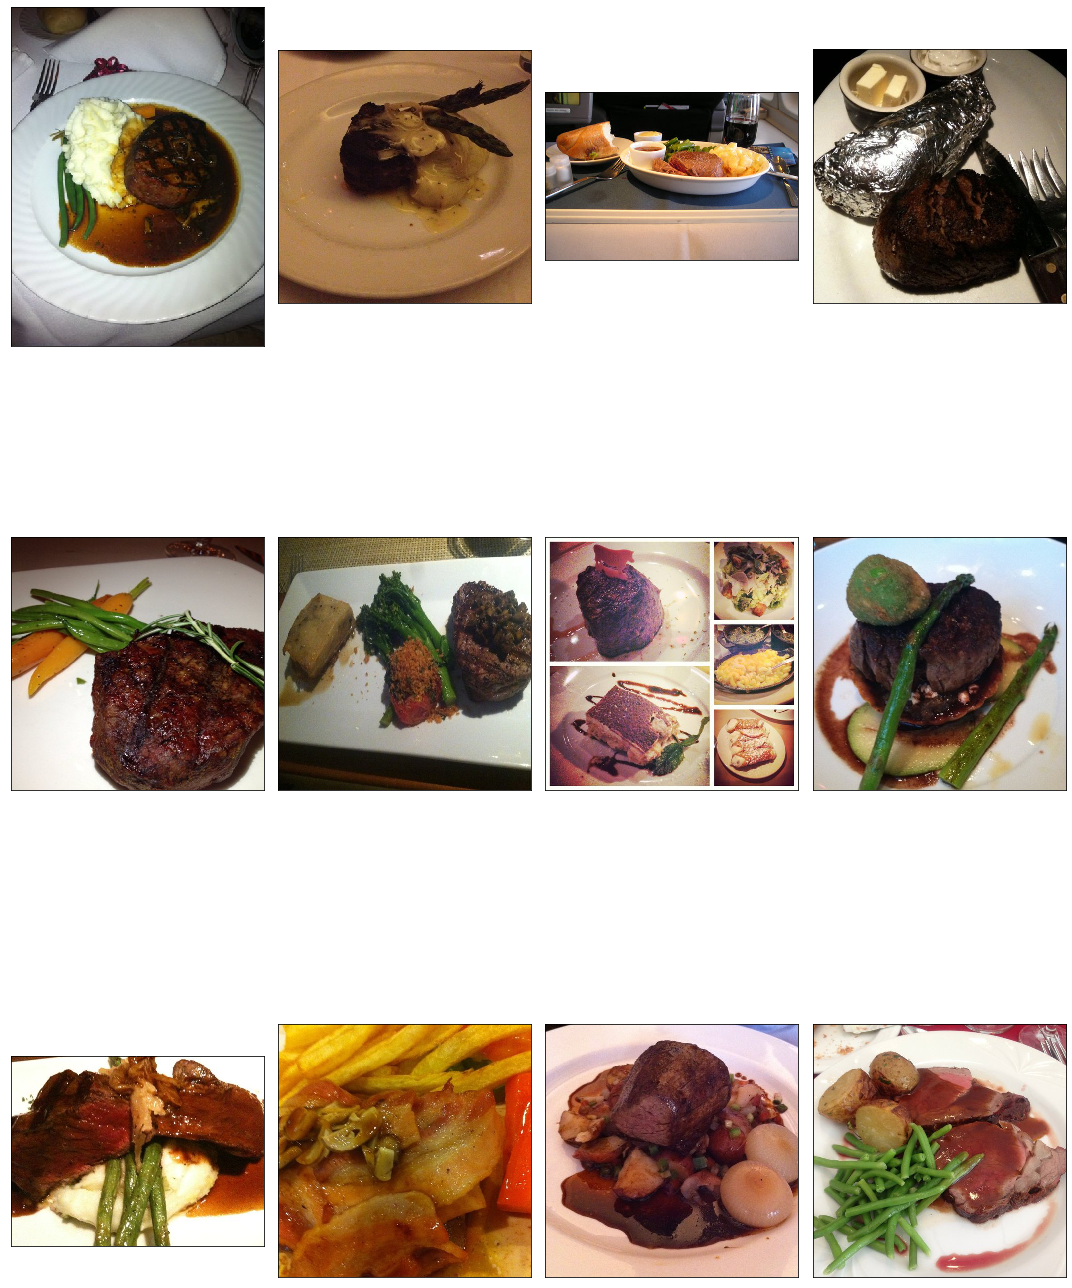

In [17]:
class_group = labelled.get_group(widget.result)
class_group.sample(12)
#3 rows * 4 cols
rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
for i in range(rows):
    for j in range(cols):
        img = plt.imread(root_dir + class_group.sample(12).iloc[i*cols + j]['image_file'])
        ax[i][j].imshow(img)
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])